In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/electricity_dataset/Electricity

/content/drive/MyDrive/electricity_dataset/Electricity


In [ ]:
import pandas as pd
import os

!pip install geopandas
!pip3 install basemap

from matplotlib.patches import Polygon as PG
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import geopandas as gpd
import folium
from matplotlib.patches import Patch
from shapely.geometry import Point, Polygon
import shapely.speedups
from geopandas import GeoDataFrame

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [ ]:
df_csv_append = pd.DataFrame()

df_csv_append = pd.read_csv('coteq_electricity_2020.csv')

len(df_csv_append)

2575

In [ ]:
df_csv_append.head()

net_manager                          purchase_area  \
0  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
1  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
2  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
3  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   
4  Cogas Infra & Beheer BV  Netbeheerder Centraal Overijssel B.V.   

          street zipcode_from zipcode_to   city  num_connections  \
0    Dorpsstraat       7468CP     7471AA  ENTER               19   
1  De Stoevelaar       7471AB     7471AB   GOOR               40   
2  De Stoevelaar       7471AC     7471AC   GOOR               16   
3  De Stoevelaar       7471AD     7471AE   GOOR               41   
4     Kerkstraat       7471AG     7471AG   GOOR               14   

   delivery_perc  perc_of_active_connections  type_conn_perc  \
0             89                          95              89   
1            100                          98              78   
2            100                         100             100   
3             93                          85              54   
4             86                         100              36   

  type_of_connection  annual_consume  annual_consume_lowtarif_perc  \
0               1x35            3810                            89   
1               1x35            2637                            95   
2               1x35            1366                           100   
3               3x25            5101                            93   
4               1x25            4315                           100   

   smartmeter_perc  
0               89  
1               83  
2               94  
3               78  
4               93

In [ ]:
municip_geo = gpd.read_file('../../geo_files/gadm41_NLD_2.shp')
municip_geo.head(2)

GID_2 GID_0      COUNTRY    GID_1   NAME_1 NL_NAME_1       NAME_2  \
0  NLD.1.1_1   NLD  Netherlands  NLD.1_1  Drenthe        NA  Aa en Hunze   
1  NLD.1.2_1   NLD  Netherlands  NLD.1_1  Drenthe        NA        Assen   

  VARNAME_2 NL_NAME_2    TYPE_2     ENGTYPE_2 CC_2    HASC_2  \
0        NA        NA  Gemeente  Municipality   NA  NL.DR.AH   
1        NA        NA  Gemeente  Municipality   NA  NL.DR.AS   

                                            geometry  
0  POLYGON ((6.56990 52.94651, 6.57448 52.95006, ...  
1  POLYGON ((6.64079 53.02571, 6.63922 53.02304, ...

<ipython-input-44-d50a59e722d2>:24: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  prov.append( PG(np.array(shape), True) )


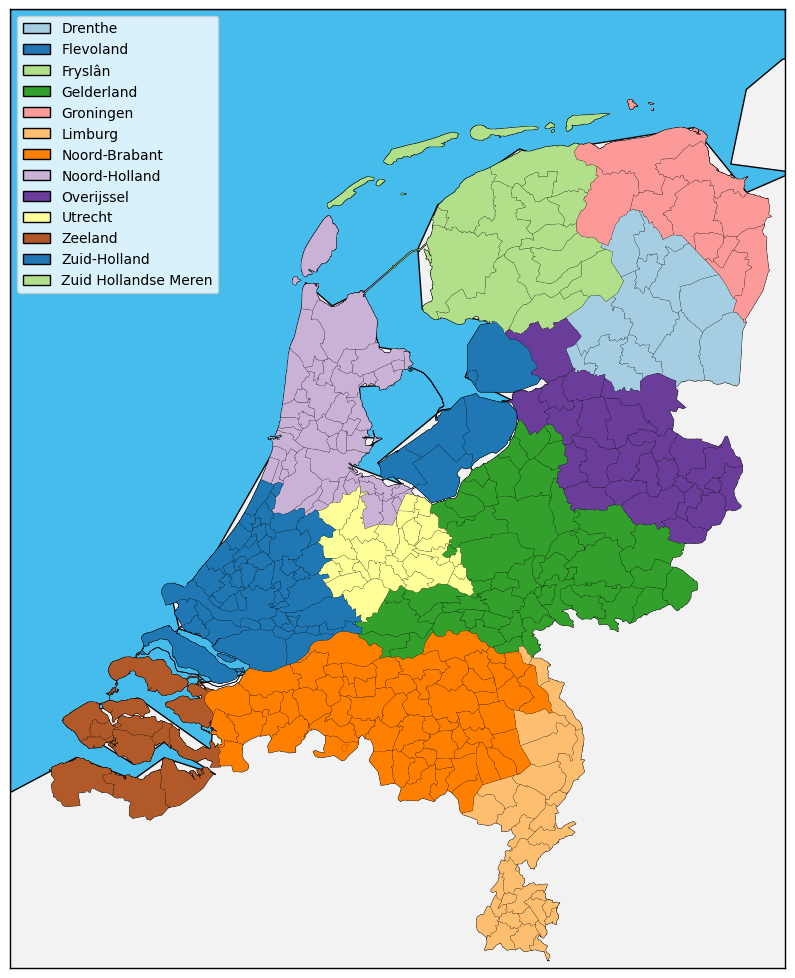

In [ ]:
municip_geo = gpd.read_file('../../geo_files/gadm41_NLD_2.shp')
municip_geo.head(2)

f, ax = plt.subplots(figsize = (10,15))
m = Basemap(resolution='l',
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=ax)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

municip_geo.head()

provinces = municip_geo.NAME_1.unique()
colors = sns.color_palette('Paired',len(provinces))
lut = dict(zip(provinces,colors))
legend_elements = []
for province in provinces: 
    prov = []
    for info, shape in zip(m.geometry_info, m.geometry):
        if (info['NAME_1'] == province) & (province not in ['Zeeuwse meren','IJsselmeer', 'Zuid Hollandse Meren']):
            prov.append( PG(np.array(shape), True) )    
    ax.add_collection(PatchCollection(prov, facecolor= lut[province], edgecolor='k', linewidths=.1, zorder=2))
    if province not in ['Zeeuwse meren','IJsselmeer']:
        legend_elements.append(Patch(facecolor=lut[province], edgecolor='k',
                         label=province))
ax.legend(handles=legend_elements)

In [ ]:
municip_geo.head(80)

GID_2 GID_0      COUNTRY    GID_1      NAME_1 NL_NAME_1  \
0    NLD.1.1_1   NLD  Netherlands  NLD.1_1     Drenthe        NA   
1    NLD.1.2_1   NLD  Netherlands  NLD.1_1     Drenthe        NA   
2    NLD.1.3_1   NLD  Netherlands  NLD.1_1     Drenthe        NA   
3    NLD.1.4_1   NLD  Netherlands  NLD.1_1     Drenthe        NA   
4    NLD.1.5_1   NLD  Netherlands  NLD.1_1     Drenthe        NA   
..         ...   ...          ...      ...         ...       ...   
75  NLD.4.54_1   NLD  Netherlands  NLD.4_1  Gelderland        NA   
76  NLD.4.56_1   NLD  Netherlands  NLD.4_1  Gelderland        NA   
77  NLD.4.58_1   NLD  Netherlands  NLD.4_1  Gelderland        NA   
78  NLD.4.60_1   NLD  Netherlands  NLD.4_1  Gelderland        NA   
79  NLD.4.79_1   NLD  Netherlands  NLD.4_1  Gelderland        NA   

           NAME_2 VARNAME_2 NL_NAME_2    TYPE_2     ENGTYPE_2 CC_2    HASC_2  \
0     Aa en Hunze        NA        NA  Gemeente  Municipality   NA  NL.DR.AH   
1           Assen        NA        NA  Gemeente  Municipality   NA  NL.DR.AS   
2   Borger-Odoorn        NA        NA  Gemeente  Municipality   NA  NL.DR.BO   
3       Coevorden        NA        NA  Gemeente  Municipality   NA  NL.DR.CO   
4       De Wolden        NA        NA  Gemeente  Municipality   NA  NL.DR.DW   
..            ...       ...       ...       ...           ...  ...       ...   
75   Scherpenzeel        NA        NA  Gemeente  Municipality   NA  NL.GE.SC   
76           Tiel        NA        NA  Gemeente  Municipality   NA  NL.GE.TI   
77         Voorst        NA        NA  Gemeente  Municipality   NA  NL.GE.VS   
78     Wageningen        NA        NA  Gemeente  Municipality   NA  NL.GE.WG   
79    West Betuwe        NA        NA  Gemeente  Municipality   NA        NA   

                                             geometry  
0   POLYGON ((6.56990 52.94651, 6.57448 52.95006, ...  
1   POLYGON ((6.64079 53.02571, 6.63922 53.02304, ...  
2   POLYGON ((6.74567 52.87925, 6.74431 52.88375, ...  
3   POLYGON ((6.87156 52.65302, 6.87122 52.65298, ...  
4   POLYGON ((6.27322 52.66813, 6.27347 52.66819, ...  
..                                                ...  
75  POLYGON ((5.49951 52.11150, 5.50684 52.11150, ...  
76  POLYGON ((5.34473 51.87448, 5.34765 51.87448, ...  
77  POLYGON ((6.08478 52.14489, 6.08231 52.14876, ...  
78  POLYGON ((5.61195 51.99472, 5.61342 51.99831, ...  
79  POLYGON ((5.25991 51.93630, 5.27160 51.93363, ...  

[80 rows x 14 columns]

In [ ]:
def load_and_reindex(path,filelist):
    start_time = datetime.now()
    df = None
    for file in filelist:
        year = file[-8:-4]
        manager = file.split('_')[0]
        if df is None:
            df = pd.read_csv(path+file)
            df['year'] = year
            df.index = manager+'_'+year+'_'+df.index.astype(str)
        else:
            temp = pd.read_csv(path+file)
            temp['year'] = year
            temp.index = manager+'_'+year+'_'+temp.index.astype(str)
            df = df.append(temp)
    # adding columns of interest
    df.fillna(0)
    df['low_tarif_consumption'] = df['annual_consume'].multiply(df['annual_consume_lowtarif_perc']/100)
    df['num_active_connections'] = df['num_connections'].multiply(df['perc_of_active_connections']/100).astype('int', errors='ignore')
    try:
        df['num_smartmeters'] = df['num_connections'].multiply(df['smartmeter_perc']/100).astype(int)
    except ValueError:
        df['num_smartmeters'] = df['num_connections'].multiply(df['smartmeter_perc']/100)
        #print('Number of smartmeters could not be calculated')
    df['net_annual_consumption'] = df['annual_consume'].multiply(df['delivery_perc']/100)
    df['self_production'] = df['annual_consume'] - df['net_annual_consumption']
    df['self_prod_perc'] = df['self_production'].divide(df['annual_consume']/100)
    
    time_elapsed = datetime.now() - start_time
    print('Made main dataframe, time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
    return(df)

path = '../Electricity/'
files_all = [f for f in os.listdir(path)]
elec_all = load_and_reindex(path,files_all)

All these functions assume the existence of lists and dataframes loaded above
It's a bit messy, but fairly obvious what I am using here

Dataframes:     postalcode_geoloc
                elec_all
                municip_geo
                
Lists:          meancols
                sumcols

In [ ]:
# first get the data into the right form
elec_all['zipcode_from_int'] = elec_all['zipcode_from'].str[:-2].astype(int)
elec_all['zipcode_to_int'] = elec_all['zipcode_to'].str[:-2].astype(int)
elec_all['zidiff'] = elec_all['zipcode_to_int'] - elec_all['zipcode_from_int']
sumcols = ['annual_consume','num_connections','low_tarif_consumption','num_active_connections','num_smartmeters','net_annual_consumption','self_production']
meancols = ['annual_consume_lowtarif_perc','delivery_perc','perc_of_active_connections','smartmeter_perc','self_prod_perc']
elec_all['provider'] = [f[0] for f in elec_all.index.str.split('_')]

# add postalcode geolocations 
postalcode_geoloc = pd.read_csv('../../geo_files/4pp.csv').set_index('postcode',drop=False)

elec_all.head()

net_manager                          purchase_area  \
coteq_2014_0  Coteq Netbeheer BV  Netbeheerder Centraal Overijssel B.V.   
coteq_2014_1  Coteq Netbeheer BV  Netbeheerder Centraal Overijssel B.V.   
coteq_2014_2  Coteq Netbeheer BV  Netbeheerder Centraal Overijssel B.V.   
coteq_2014_3  Coteq Netbeheer BV  Netbeheerder Centraal Overijssel B.V.   
coteq_2014_4  Coteq Netbeheer BV  Netbeheerder Centraal Overijssel B.V.   

                     street zipcode_from zipcode_to   city  num_connections  \
coteq_2014_0    Dorpsstraat       7468CP     7471AA  ENTER             19.0   
coteq_2014_1  De Stoevelaar       7471AB     7471AB   GOOR             37.0   
coteq_2014_2  De Stoevelaar       7471AC     7471AC   GOOR             16.0   
coteq_2014_3  De Stoevelaar       7471AD     7471AE   GOOR             25.0   
coteq_2014_4     Kerkstraat       7471AG     7471AG   GOOR             14.0   

              delivery_perc  perc_of_active_connections type_conn_perc  ...  \
coteq_2014_0          89.47                       94.74           89.0  ...   
coteq_2014_1         100.00                      100.00           86.0  ...   
coteq_2014_2         100.00                      100.00          100.0  ...   
coteq_2014_3          92.00                       84.00           44.0  ...   
coteq_2014_4          85.71                      100.00           36.0  ...   

             low_tarif_consumption  num_active_connections  num_smartmeters  \
coteq_2014_0             3687.9534                 18.0006              0.0   
coteq_2014_1             1702.6200                 37.0000              0.0   
coteq_2014_2             1315.0000                 16.0000              0.0   
coteq_2014_3             5868.6800                 21.0000              0.0   
coteq_2014_4             4089.5544                 14.0000              0.0   

              net_annual_consumption self_production  self_prod_perc  \
coteq_2014_0               3687.9534        434.0466           10.53   
coteq_2014_1               1800.0000          0.0000            0.00   
coteq_2014_2               1315.0000          0.0000            0.00   
coteq_2014_3               5868.6800        510.3200            8.00   
coteq_2014_4               3774.6684        629.3316           14.29   

              zipcode_from_int zipcode_to_int  zidiff  provider  
coteq_2014_0              7468           7471       3     coteq  
coteq_2014_1              7471           7471       0     coteq  
coteq_2014_2              7471           7471       0     coteq  
coteq_2014_3              7471           7471       0     coteq  
coteq_2014_4              7471           7471       0     coteq  

[5 rows x 28 columns]

In [ ]:
def make_group_zipcode(year,df):
    df = df[df.year==year]
    pc_df = df.groupby('zipcode_from_int').sum()[sumcols]#.count()['city']
    pc_df = pc_df.join(df.groupby('zipcode_from_int').mean()[meancols])
    pc_df = pc_df.join(df.groupby('zipcode_from_int').count()['city']).rename({'city':'code_count'},axis=1)
    pc_df = pc_df.join(df.groupby('zipcode_from_int').first()[['city','provider']])
    values = [year+'_'+f for f in pc_df.columns]
    pc_df.rename(dict(zip(pc_df.columns,values)),axis=1,inplace=True)
    pc_df = pc_df.join(postalcode_geoloc,how='left') #add geolocation
    
    geometry = [Point(xy) for xy in zip(pc_df.longitude, pc_df.latitude)]
    crs = {'init': 'epsg:4326'}
    gdf = GeoDataFrame(pc_df, crs=crs, geometry=geometry) # make geopandas df
    pc_df = attach_municip(pc_df,gdf)
    return pc_df

def attach_municip(df,geodf):
    for municip in municip_geo.GID_2:
        idx = municip_geo[municip_geo.GID_2==municip].index[0]
        municip_name = municip_geo.loc[idx,'NAME_2']
        ingroup = list(geodf[geodf['geometry'].within(municip_geo.loc[idx,'geometry'])==True].index)
        df.loc[ingroup,'GID_2'] = municip
        df.loc[ingroup,'NAME_2'] = municip_name
    return(df)

def merge_energy_data_into_municip(df,year):
    pc_df = make_group_zipcode(year,df)
    firstcols = ['NAME_2','provincie','netnummer',year+'_provider']
    meancols_y = [year+'_'+f for f in meancols]
    sumcols_y = [year+'_'+f for f in sumcols]
    sumcols_y.append(year+'_code_count')
    final_frame = pc_df.groupby('GID_2').first()[firstcols]
    final_frame['GID_2'] = final_frame.index
    final_frame = final_frame.join(pc_df.groupby('GID_2').mean()[meancols_y])
    final_frame = final_frame.join(pc_df.groupby('GID_2').sum()[sumcols_y])
    polygon_frame = pd.DataFrame({
        'shapes': [PG(np.array(shape),True) for shape in m.geometry],
        'GID_2': [area['GID_2'] for area in m.geometry_info]})
    
    polygon_frame.reset_index(drop = True, inplace = True)
    final_frame.reset_index(drop = True, inplace = True)

    polygon_frame = polygon_frame.merge(final_frame, on='GID_2', how='left')
    return final_frame, polygon_frame

fin_2018, poly2018 = merge_energy_data_into_municip(elec_all,'2018')

pc_2018 = make_group_zipcode('2018',elec_all)

f,ax = plt.subplots(figsize=(11,13))
#pc2018.plot.scatter('longitude','latitude',s=pc2018['2018_num_active_connections'].astype(float).divide(2e2)
#                    ,alpha=.4,ax=ax)
pc_2018.plot.scatter('longitude','latitude',s=pc_2018['2018_num_active_connections'].astype(float).divide(2e2)
                    ,alpha=.4,ax=ax)
plt.title('Number of active connections per 4-digit postal code, 2018')

In [ ]:
fin_2011, poly2011 = merge_energy_data_into_municip(elec_all,'2011')
fin_2012, poly2012 = merge_energy_data_into_municip(elec_all,'2012')
fin_2013, poly2013 = merge_energy_data_into_municip(elec_all,'2013')
fin_2014, poly2014 = merge_energy_data_into_municip(elec_all,'2014')
fin_2015, poly2015 = merge_energy_data_into_municip(elec_all,'2015')
fin_2016, poly2016 = merge_energy_data_into_municip(elec_all,'2016')
fin_2017, poly2017 = merge_energy_data_into_municip(elec_all,'2017')
fin_2018, poly2018 = merge_energy_data_into_municip(elec_all,'2018')

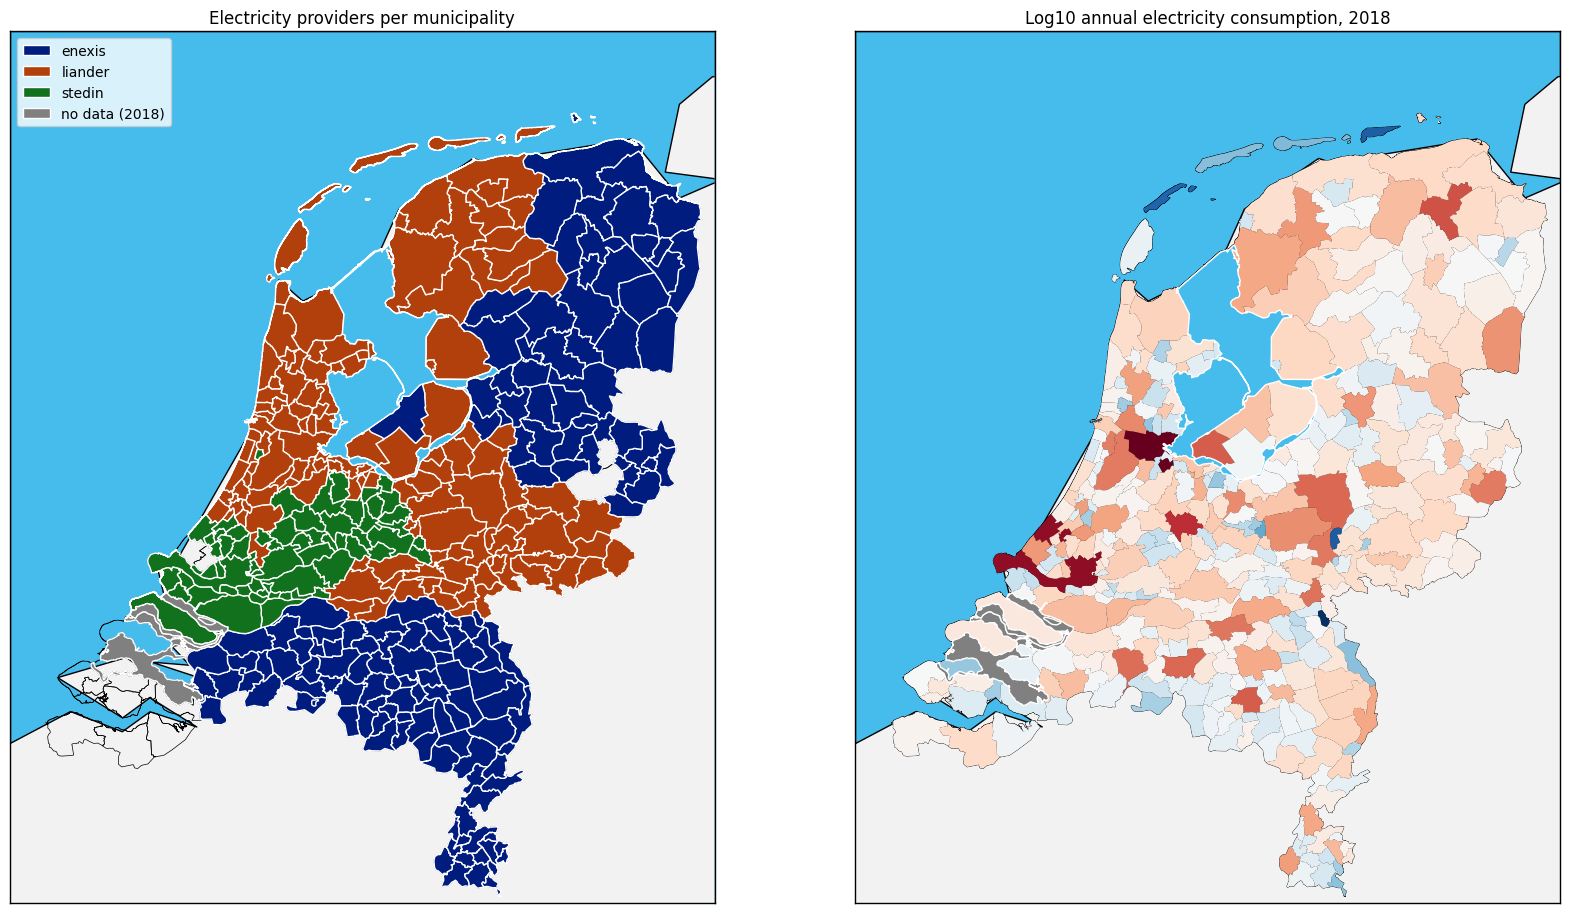

In [ ]:
# pd.set_option('display.max_rows', poly2018.shape[0]+1)
# print(poly2018)

f, ax = plt.subplots(1,2,figsize = (20,24))
m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=ax[0])
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()


providers = ['enexis','liander','stedin']
colors = sns.color_palette('dark',len(providers))
lut = dict(zip(providers,colors))

# there must be a cleaner way to do all this, but I'm leaving it for now
pc_lian = poly2018[poly2018['2018_provider']=='liander'] 
pc_enex = poly2018[poly2018['2018_provider']=='enexis'] 
pc_sted = poly2018[poly2018['2018_provider']=='stedin'] 
pcna = poly2018[poly2018['provincie'].isna()] # municipalities not having data
pcij = poly2018[(poly2018.GID_2=="NLD.6_1")|(poly2018.GID_2=="NLD.6.1_1")] #polygons ijsselmeer, zeeuwse meren

pcl = PatchCollection(pc_lian.shapes, zorder=2)
pce = PatchCollection(pc_enex.shapes, zorder=2)
pcs = PatchCollection(pc_sted.shapes, zorder=2)
pna = PatchCollection(pcna.shapes, zorder=2)
pij = PatchCollection(pcij.shapes, zorder=2)

pcl.set_facecolor(lut['liander'])
pce.set_facecolor(lut['enexis'])
pcs.set_facecolor(lut['stedin'])
pna.set_facecolor('gray')
pij.set_facecolor('#46bcec')

pna.set_edgecolor('white')
pij.set_edgecolor('white')
pcs.set_edgecolor('white')
pce.set_edgecolor('white')
pcl.set_edgecolor('white')


ax[0].add_collection(pcl)
ax[0].add_collection(pce)
ax[0].add_collection(pcs)

ax[0].add_collection(pna)
ax[0].add_collection(pij)

legend_elements = []
for provider in providers: 
    legend_elements.append(Patch(facecolor=lut[provider], edgecolor='white',
                         label=provider))
legend_elements.append(Patch(facecolor='gray',edgecolor='white',label='no data (2018)'))
ax[0].legend(handles=legend_elements)
ax[0].set_title('Electricity providers per municipality')

m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=ax[1])
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()


pc2 = poly2018[~poly2018['provincie'].isna()] # all others 

norm = Normalize()
cmap = plt.get_cmap('RdBu_r') 
#cmap = plt.get_cmap('Oranges') 
pc = PatchCollection(pc2.shapes,zorder=2)
pna2 = PatchCollection(pcna.shapes, zorder=2)
pij2 = PatchCollection(pcij.shapes, zorder=2)

pc.set_facecolor(cmap(norm(np.log10(pc2['2018_annual_consume'].values))))
pna2.set_facecolor('gray')
pij2.set_facecolor('#46bcec')

pna2.set_edgecolor('white')
pij2.set_edgecolor('white')

ax[1].add_collection(pc)
ax[1].add_collection(pna2)
ax[1].add_collection(pij2)
ax[1].set_title('Log10 annual electricity consumption, 2018')
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(poly2018['2018_annual_consume'])

In [ ]:
poly2011.head()

shapes      GID_2         NAME_2 provincie  \
0  Polygon133((380276, 404259) ...)  NLD.1.1_1    Aa en Hunze   Drenthe   
1  Polygon101((388158, 418889) ...)  NLD.1.2_1          Assen   Drenthe   
2  Polygon113((399820, 391856) ...)  NLD.1.3_1  Borger-Odoorn   Drenthe   
3  Polygon229((413819, 350281) ...)  NLD.1.4_1      Coevorden   Drenthe   
4  Polygon229((347286, 353052) ...)  NLD.1.5_1      De Wolden   Drenthe   

   netnummer 2011_provider  2011_annual_consume_lowtarif_perc  \
0      592.0        enexis                          36.999577   
1      592.0        enexis                          32.797988   
2      599.0        enexis                          35.078448   
3      524.0        enexis                          37.700492   
4      523.0        enexis                          39.247142   

   2011_delivery_perc  2011_perc_of_active_connections  2011_smartmeter_perc  \
0           99.736128                            100.0              0.130840   
1           99.939183                            100.0              0.128742   
2           99.776157                            100.0              0.141368   
3           99.904339                            100.0              0.105347   
4           99.801684                            100.0              0.137552   

   2011_self_prod_perc  2011_annual_consume  2011_num_connections  \
0             0.263872            2791577.0               10927.0   
1             0.060817            5724097.0               29492.0   
2             0.223843            3560224.0               14699.0   
3             0.095661            4155235.0               16670.0   
4             0.198316            2917300.0                9973.0   

   2011_low_tarif_consumption  2011_num_active_connections  \
0                   990535.21                      10927.0   
1                  1656458.21                      29492.0   
2                  1215387.89                      14699.0   
3                  1555427.24                      16670.0   
4                  1142643.05                       9973.0   

   2011_num_smartmeters  2011_net_annual_consumption  2011_self_production  \
0                 11.39                   2786984.38               4592.62   
1                 17.83                   5716729.01               7367.99   
2                  8.06                   3553471.08               6752.92   
3                  9.05                   4147460.10               7774.90   
4                  8.11                   2911718.94               5581.06   

   2011_code_count  
0            555.0  
1           1434.0  
2            726.0  
3            825.0  
4            524.0

In [ ]:
# join all poly_dfs at the hip

# there is a smarter way but im getting tired
excludecols = ['shapes', 'GID_2', 'NAME_2', 'provincie', 'netnummer']
incols = [f for f in poly2011.columns if f not in excludecols]
combineddf = poly2018.join(poly2011[incols],how='left')
year = '2012'
incols = [year+f[4:] for f in incols]
combineddf = combineddf.join(poly2012[incols],how='left')

year = '2013'
incols = [year+f[4:] for f in incols]
combineddf = combineddf.join(poly2013[incols],how='left')

year = '2014'
incols = [year+f[4:] for f in incols]
combineddf = combineddf.join(poly2014[incols],how='left')

year = '2015'
incols = [year+f[4:] for f in incols]
combineddf = combineddf.join(poly2015[incols],how='left')

year = '2016'
incols = [year+f[4:] for f in incols]
combineddf = combineddf.join(poly2016[incols],how='left')

year = '2017'
incols = [year+f[4:] for f in incols]
combineddf = combineddf.join(poly2017[incols],how='left')

<ipython-input-59-2ea679758073>:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, shrink=0.4)
<ipython-input-59-2ea679758073>:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, shrink=0.4)
<ipython-input-59-2ea679758073>:89: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* 

Text(0.5, 1.0, 'Smartmeter percentage, 2018')

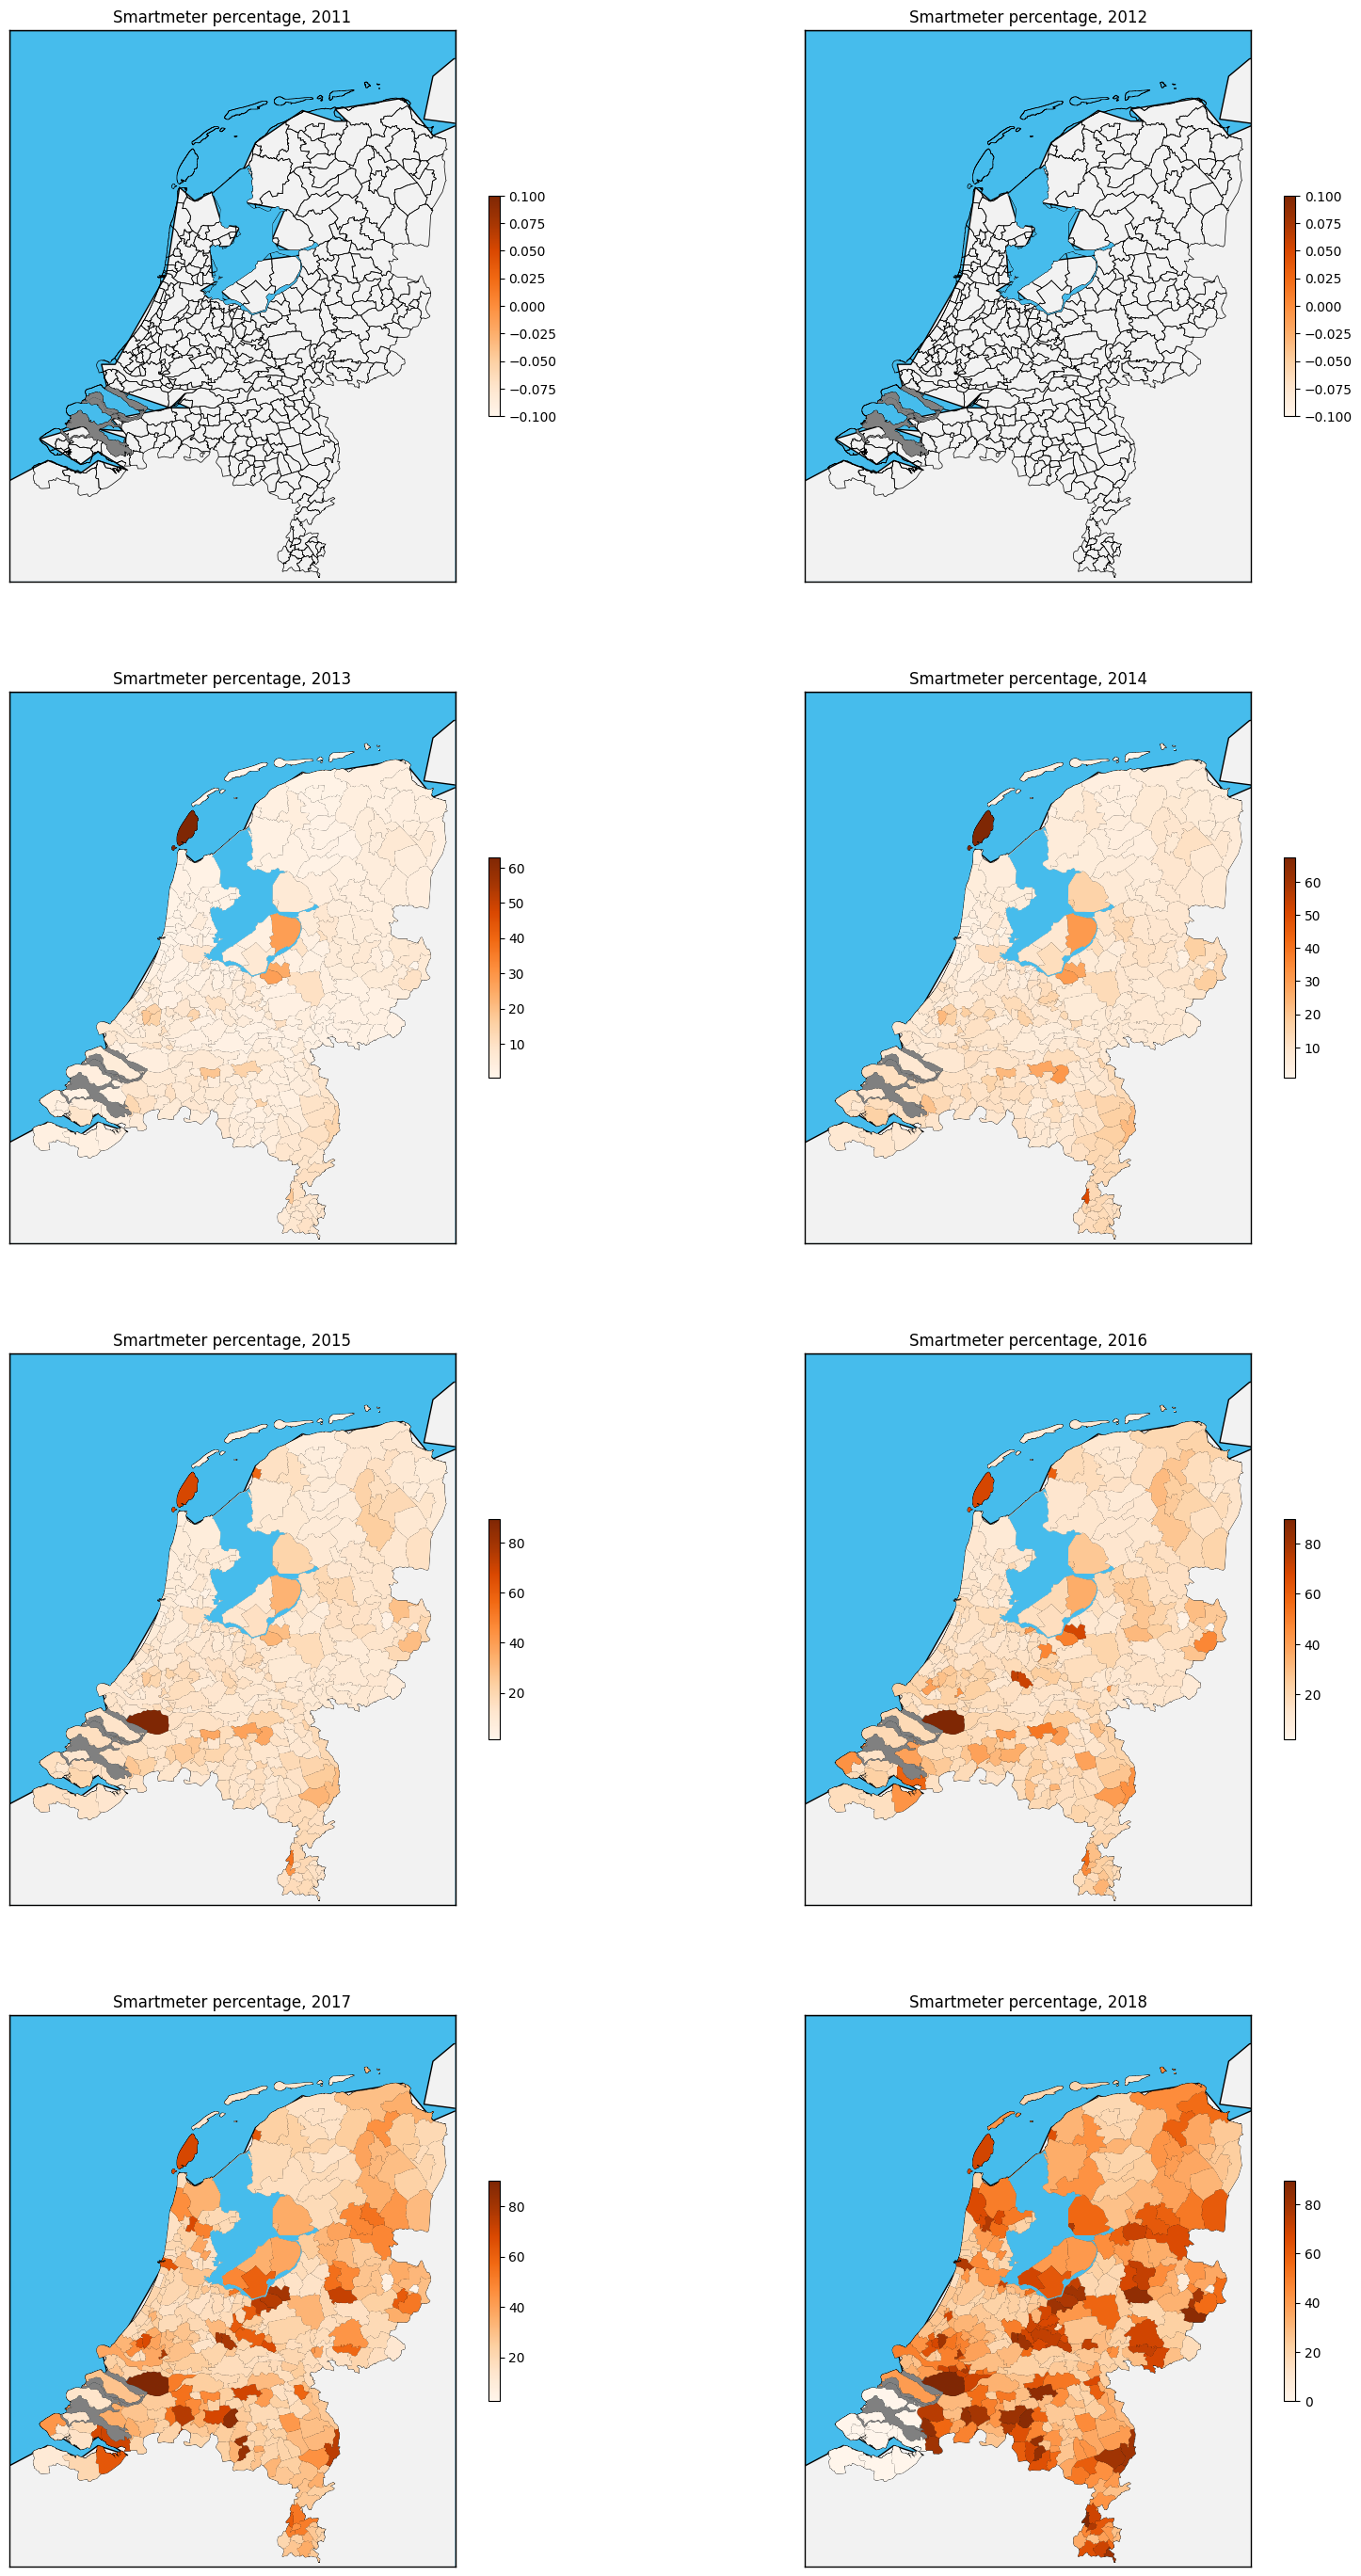

In [ ]:
param = 'smartmeter_perc'

f = plt.figure(figsize = (20,35))
gs = gridspec.GridSpec(4,2)

patch1 = combineddf[~combineddf['provincie'].isna()] # all others 
patch2 = combineddf[combineddf['provincie'].isna()] # municipalities not having data
patch3 = combineddf[(poly2018.GID_2=="NLD.6_1")|(poly2018.GID_2=="NLD.6.1_1")] #polygons ijsselmeer&zeeuwse meren

y2011 = f.add_subplot(gs[0,0]);year='2011'
m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2011)
m.drawmapboundary(fill_color='#46bcec') #46bcec
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

norm = Normalize()
cmap = plt.get_cmap('RdBu_r') 
cmap = plt.get_cmap('Oranges') 
pc = PatchCollection(patch1.shapes,zorder=2)
pna = PatchCollection(patch2.shapes, zorder=2)
pij = PatchCollection(patch3.shapes, zorder=2)
pc.set_facecolor(cmap(norm(patch1[year+'_'+param].values)))
pna.set_facecolor('gray')
pij.set_facecolor('#46bcec')
y2011.add_collection(pc)
y2011.add_collection(pna)
y2011.add_collection(pij)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(combineddf[year+'_'+param])
plt.colorbar(mapper, shrink=0.4)
plt.title('Smartmeter percentage, '+year)

y2012 = f.add_subplot(gs[0,1]);year='2012'
m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2012)
m.drawmapboundary(fill_color='#46bcec') #46bcec
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

norm = Normalize()
cmap = plt.get_cmap('RdBu_r') 
cmap = plt.get_cmap('Oranges') 
pc = PatchCollection(patch1.shapes,zorder=2)
pna = PatchCollection(patch2.shapes, zorder=2)
pij = PatchCollection(patch3.shapes, zorder=2)
pc.set_facecolor(cmap(norm(patch1[year+'_'+param].values)))
pna.set_facecolor('gray')
pij.set_facecolor('#46bcec')
y2012.add_collection(pc)
y2012.add_collection(pna)
y2012.add_collection(pij)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(combineddf[year+'_'+param])
plt.colorbar(mapper, shrink=0.4)
plt.title('Smartmeter percentage, '+year)


y2013 = f.add_subplot(gs[1,0]);year='2013'
m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2013)
m.drawmapboundary(fill_color='#46bcec') #46bcec
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

norm = Normalize()
cmap = plt.get_cmap('RdBu_r') 
cmap = plt.get_cmap('Oranges') 
pc = PatchCollection(patch1.shapes,zorder=2)
pna = PatchCollection(patch2.shapes, zorder=2)
pij = PatchCollection(patch3.shapes, zorder=2)
pc.set_facecolor(cmap(norm(patch1[year+'_'+param].values)))
pna.set_facecolor('gray')
pij.set_facecolor('#46bcec')
y2013.add_collection(pc)
y2013.add_collection(pna)
y2013.add_collection(pij)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(combineddf[year+'_'+param])
plt.colorbar(mapper, shrink=0.4)
plt.title('Smartmeter percentage, '+year)


y2014 = f.add_subplot(gs[1,1]);year='2014'
m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2014)
m.drawmapboundary(fill_color='#46bcec') #46bcec
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

norm = Normalize()
cmap = plt.get_cmap('RdBu_r') 
cmap = plt.get_cmap('Oranges') 
pc = PatchCollection(patch1.shapes,zorder=2)
pna = PatchCollection(patch2.shapes, zorder=2)
pij = PatchCollection(patch3.shapes, zorder=2)
pc.set_facecolor(cmap(norm(patch1[year+'_'+param].values)))
pna.set_facecolor('gray')
pij.set_facecolor('#46bcec')
y2014.add_collection(pc)
y2014.add_collection(pna)
y2014.add_collection(pij)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(combineddf[year+'_'+param])
plt.colorbar(mapper, shrink=0.4)
plt.title('Smartmeter percentage, '+year)

y2015 = f.add_subplot(gs[2,0]);year='2015'
m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2015)
m.drawmapboundary(fill_color='#46bcec') #46bcec
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

norm = Normalize()
cmap = plt.get_cmap('RdBu_r') 
cmap = plt.get_cmap('Oranges') 
pc = PatchCollection(patch1.shapes,zorder=2)
pna = PatchCollection(patch2.shapes, zorder=2)
pij = PatchCollection(patch3.shapes, zorder=2)
pc.set_facecolor(cmap(norm(patch1[year+'_'+param].values)))
pna.set_facecolor('gray')
pij.set_facecolor('#46bcec')
y2015.add_collection(pc)
y2015.add_collection(pna)
y2015.add_collection(pij)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(combineddf[year+'_'+param])
plt.colorbar(mapper, shrink=0.4)
plt.title('Smartmeter percentage, '+year)


y2016 = f.add_subplot(gs[2,1]);year='2016'
m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2016)
m.drawmapboundary(fill_color='#46bcec') #46bcec
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

norm = Normalize()
cmap = plt.get_cmap('RdBu_r') 
cmap = plt.get_cmap('Oranges') 
pc = PatchCollection(patch1.shapes,zorder=2)
pna = PatchCollection(patch2.shapes, zorder=2)
pij = PatchCollection(patch3.shapes, zorder=2)
pc.set_facecolor(cmap(norm(patch1[year+'_'+param].values)))
pna.set_facecolor('gray')
pij.set_facecolor('#46bcec')
y2016.add_collection(pc)
y2016.add_collection(pna)
y2016.add_collection(pij)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(combineddf[year+'_'+param])
plt.colorbar(mapper, shrink=0.4)
plt.title('Smartmeter percentage, '+year)


y2017 = f.add_subplot(gs[3,0]);year='2017'
m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2017)
m.drawmapboundary(fill_color='#46bcec') #46bcec
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

norm = Normalize()
cmap = plt.get_cmap('RdBu_r') 
cmap = plt.get_cmap('Oranges') 
pc = PatchCollection(patch1.shapes,zorder=2)
pna = PatchCollection(patch2.shapes, zorder=2)
pij = PatchCollection(patch3.shapes, zorder=2)
pc.set_facecolor(cmap(norm(patch1[year+'_'+param].values)))
pna.set_facecolor('gray')
pij.set_facecolor('#46bcec')
y2017.add_collection(pc)
y2017.add_collection(pna)
y2017.add_collection(pij)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(combineddf[year+'_'+param])
plt.colorbar(mapper, shrink=0.4)
plt.title('Smartmeter percentage, '+year)


y2018 = f.add_subplot(gs[3,1]);year='2018'
m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2018)
m.drawmapboundary(fill_color='#46bcec') #46bcec
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

norm = Normalize()
cmap = plt.get_cmap('RdBu_r') 
cmap = plt.get_cmap('Oranges') 
pc = PatchCollection(patch1.shapes,zorder=2)
pna = PatchCollection(patch2.shapes, zorder=2)
pij = PatchCollection(patch3.shapes, zorder=2)
pc.set_facecolor(cmap(norm(patch1[year+'_'+param].values)))
pna.set_facecolor('gray')
pij.set_facecolor('#46bcec')
y2018.add_collection(pc)
y2018.add_collection(pna)
y2018.add_collection(pij)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(combineddf[year+'_'+param])
plt.colorbar(mapper, shrink=0.4)
plt.title('Smartmeter percentage, '+year)

In [ ]:
#param = 'smartmeter_perc';fancy_name = 'Smartmeter percentage'
#param = 'self_prod_perc';fancy_name = 'Self-production percentage'
#param = 'annual_consume_lowtarif_perc';fancy_name = 'Lowtarif consumption percentage'
#param = 'perc_of_active_connections';fancy_name = 'Percentage of active connections'
# param = 'annual_consume';fancy_name = 'Log10 annual consumption (kWh)'
param = 'self_production';fancy_name = 'Log10 self-production (kWh)'
for i in range(2011,2019):
    year = str(i)
    f = plt.figure(figsize = (10,10))
    gs = gridspec.GridSpec(1,1)

    patch1 = combineddf[~combineddf['provincie'].isna()] # all others 
    patch2 = combineddf[combineddf['provincie'].isna()] # municipalities not having data
    patch3 = combineddf[(poly2018.GID_2=="NLD.6_1")|(poly2018.GID_2=="NLD.6.1_1")] #polygons ijsselmeer&zeeuwse meren

    y2011 = f.add_subplot(gs[0,0]);
    m = Basemap(resolution='l', # c, l, i, h, f or None (courseness)
                projection='merc',
                lat_0=54.5, lon_0=-4.36,
                llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2011)
    m.drawmapboundary(fill_color='#46bcec') #46bcec
    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
    m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
    m.drawcoastlines()

    #norm = Normalize()
    norm = mpl.colors.Normalize(vmin=0, vmax=7)
    cmap = plt.get_cmap('RdBu_r') 
    #cmap = plt.get_cmap('Oranges') 
    pc = PatchCollection(patch1.shapes,zorder=2)
    pna = PatchCollection(patch2.shapes, zorder=2)
    pij = PatchCollection(patch3.shapes, zorder=2)
    pc.set_facecolor(cmap(norm(np.log10(patch1[year+'_'+param].values+0.00001))))
    pna.set_facecolor('gray')
    pij.set_facecolor('#46bcec')
    y2011.add_collection(pc)
    y2011.add_collection(pna)
    y2011.add_collection(pij)
    mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    mapper.set_array(combineddf[year+'_'+param])
    plt.colorbar(mapper, shrink=0.4)
    plt.title(fancy_name+', '+year)
    
    f.savefig(param+'_'+year+'_rdbu.png')
    plt.close(f)

<ipython-input-62-0231b262e974>:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, shrink=0.4)
<ipython-input-62-0231b262e974>:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, shrink=0.4)
<ipython-input-62-0231b262e974>:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* 

<ipython-input-63-a745edba77d3>:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))


self_production_2011_rdbu.png
self_production_2011_rdbu_1.png
self_production_2011_rdbu_2.png
self_production_2012_rdbu.png
self_production_2012_rdbu_1.png
self_production_2012_rdbu_2.png
self_production_2013_rdbu.png
self_production_2013_rdbu_1.png
self_production_2013_rdbu_2.png
self_production_2014_rdbu.png
self_production_2014_rdbu_1.png
self_production_2014_rdbu_2.png
self_production_2015_rdbu.png
self_production_2015_rdbu_1.png
self_production_2015_rdbu_2.png
self_production_2016_rdbu.png
self_production_2016_rdbu_1.png
self_production_2016_rdbu_2.png
self_production_2017_rdbu.png
self_production_2017_rdbu_1.png
self_production_2017_rdbu_2.png
self_production_2018_rdbu.png
self_production_2018_rdbu_1.png
self_production_2018_rdbu_2.png
self_production_2018_rdbu_3.png
self_production_2018_rdbu_4.png


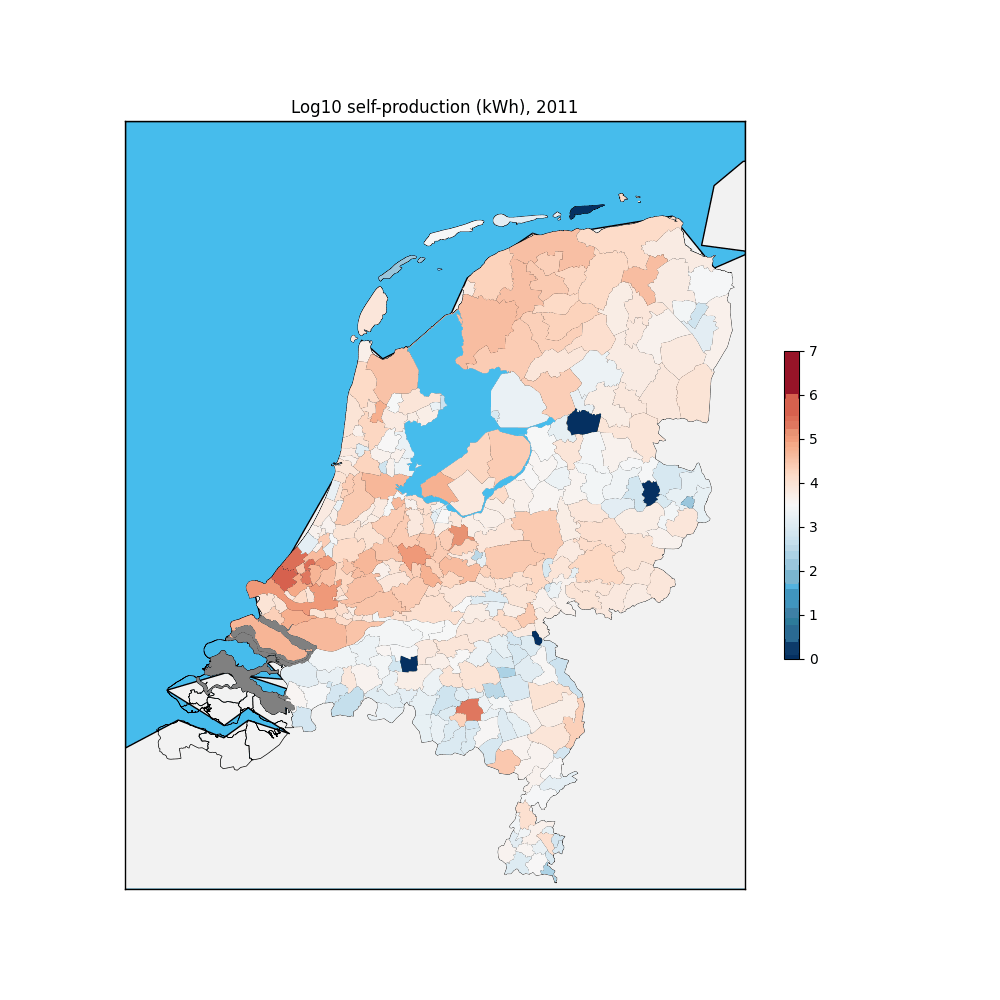

In [ ]:
import imageio
import glob
files = glob.glob(param+'*')
files = np.sort(files)
# make a copy of each image to slow down gif by factor 2
from shutil import copyfile
for file in files:
    copyfile(file, file.split('.')[0]+'_1.png')
    copyfile(file, file.split('.')[0]+'_2.png')
    if '2018' in file:
        copyfile(file, file.split('.')[0]+'_3.png')
        copyfile(file, file.split('.')[0]+'_4.png')
files = glob.glob(param+'*')
files = np.sort(files)
images = []
for file in files:
    # imageio.imread(file) creates a numpy matrix array
    # In this case a 200 x 200 matrix for every file, since the files are 200 x 200 pixels.
    images.append(imageio.imread(file))
    print(file)
imageio.mimsave('map_selfprod.gif', images)

# step 3: prep the gif for display in notebook 
from IPython.display import Image
Image("map_selfprod.gif")